<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks_solutions/AIDL_A02_ASL_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download ASL data from Kaggle
https://www.kaggle.com/general/74235

1. Create a Kaggle account or link it with an existing one (e.g., Gmail).

2. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

3. Click on Create New API Token - It will download kaggle.json file on your machine.

In [1]:
# install library
! pip install -q kaggle

In [2]:
# import files class to upload files to colab
from google.colab import files

In [3]:
# upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pkasnesis","key":"d202848b9a00e8f6959f9753b8abf697"}'}

In [4]:
# Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download asl dataset and unzip to asl folder
! kaggle datasets download 'grassknoted/asl-alphabet'
! mkdir asl
! unzip asl-alphabet.zip  -d asl

Streaming output truncated to the last 5000 lines.
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothin

In [6]:
ls

asl/  asl-alphabet.zip  kaggle.json  sample_data/


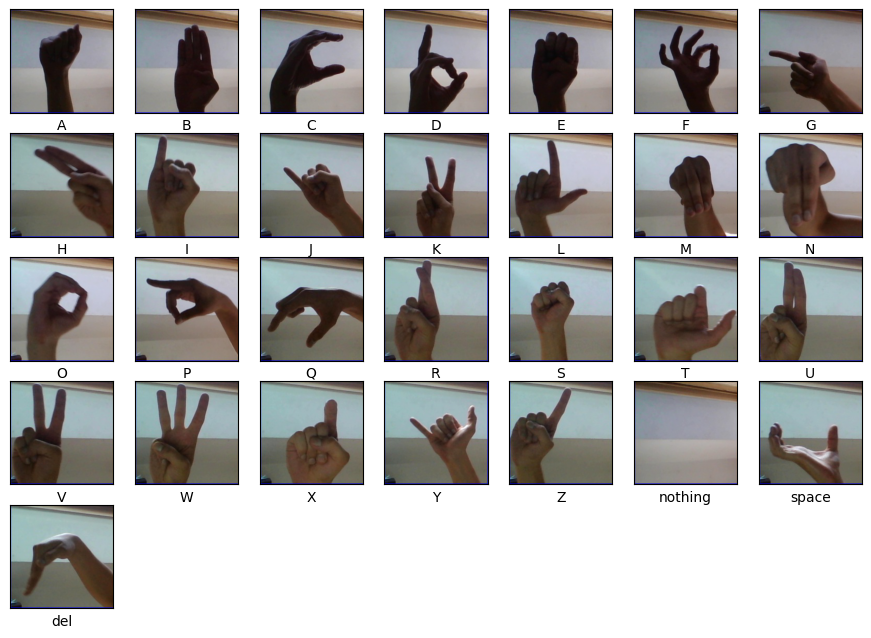

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from time import time
import os
import cv2
import numpy as np
%matplotlib inline

train_dir = 'asl/asl_alphabet_train/asl_alphabet_train'
test_dir = 'asl/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [8]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 0)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data(train_dir)

Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)


In [9]:
# delibately decrease the train size to make the task more difficult for the project
x_train = x_train[:5000]
y_train = y_train[:5000]

# TO DO

#Train custom CCN Network (no tranfer learning or data augmentation!)

1. Use a validation set 10% from train with seed = 1
2. Save model during training. I.e., best validation loss
3. Obtain the classication results from the test set.
4. Achieve over 96% accuracy in the test set

In [10]:
# You can import more tensorflow.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
classes = 29
batch = 128 #You can change this
epochs = 300 #You can change this

In [12]:
 # DO NOT change this
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 1) 

In [13]:
#You can change this

model = Sequential()
model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.5))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.5))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation = 'softmax'))

In [14]:
save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_data=(x_val, y_val), shuffle = True, verbose=1, 
                    callbacks=[save_model])

Epoch 1/300
36/36 [==============================] - ETA: 0s - loss: 3.6308 - accuracy: 0.0751
Epoch 1: val_loss improved from inf to 5.64156, saving model to best_model.h5
36/36 [==============================] - 15s 30ms/step - loss: 3.6308 - accuracy: 0.0751 - val_loss: 5.6416 - val_accuracy: 0.0220
Epoch 2/300
33/36 [==========================>...] - ETA: 0s - loss: 3.0788 - accuracy: 0.1207
Epoch 2: val_loss did not improve from 5.64156
36/36 [==============================] - 0s 13ms/step - loss: 3.0785 - accuracy: 0.1196 - val_loss: 11.7581 - val_accuracy: 0.0220
Epoch 3/300
34/36 [===========================>..] - ETA: 0s - loss: 2.8641 - accuracy: 0.1585
Epoch 3: val_loss did not improve from 5.64156
36/36 [==============================] - 0s 13ms/step - loss: 2.8595 - accuracy: 0.1587 - val_loss: 17.4258 - val_accuracy: 0.0220
Epoch 4/300
31/36 [========================>.....] - ETA: 0s - loss: 2.6574 - accuracy: 0.2102
Epoch 4: val_loss did not improve from 5.64156
36/36 [=

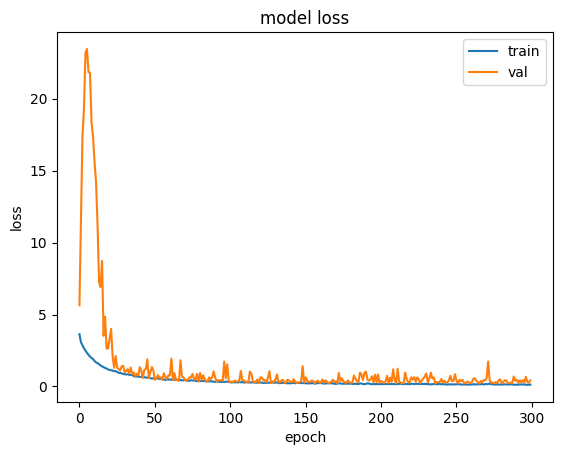

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

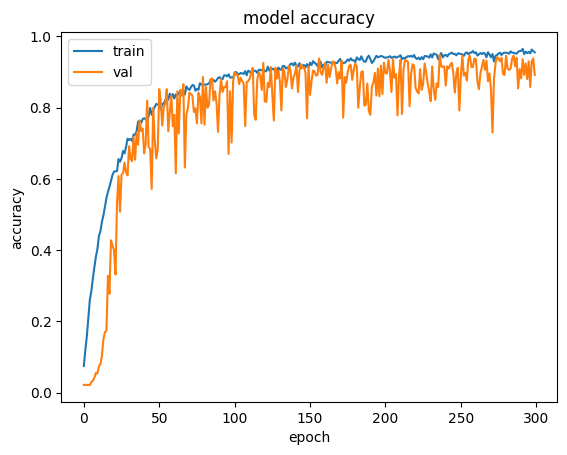

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
history.model.load_weights('best_model.h5')
test_acc = np.mean(np.argmax(history.model.predict(x_test),1)==np.argmax(y_test,1))
print('The submitted model has test accuracy equal to {}'.format(test_acc))

272/272 [==============================] - 1s 3ms/step
The submitted model has test accuracy equal to 0.9397701149425287


In [18]:
np.mean(np.argmax(history.model.predict(x_train),1)==np.argmax(y_train,1))

141/141 [==============================] - 0s 3ms/step


0.9995555555555555